# <font color="#ffb1907"> Desafio Individual - Modelos de Classificação e Regressão Logística


## 1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn), responda:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

a. Faça uma análise inicial sobre esse dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species names
142,5.8,2.7,5.1,1.9,2,virginica
90,5.5,2.6,4.4,1.2,1,versicolor
39,5.1,3.4,1.5,0.2,0,setosa
21,5.1,3.7,1.5,0.4,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
89,5.5,2.5,4.0,1.3,1,versicolor
105,7.6,3.0,6.6,2.1,2,virginica
48,5.3,3.7,1.5,0.2,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species names        0
dtype: int64

In [ ]:
df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species                 int64
species names        category
dtype: object

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.

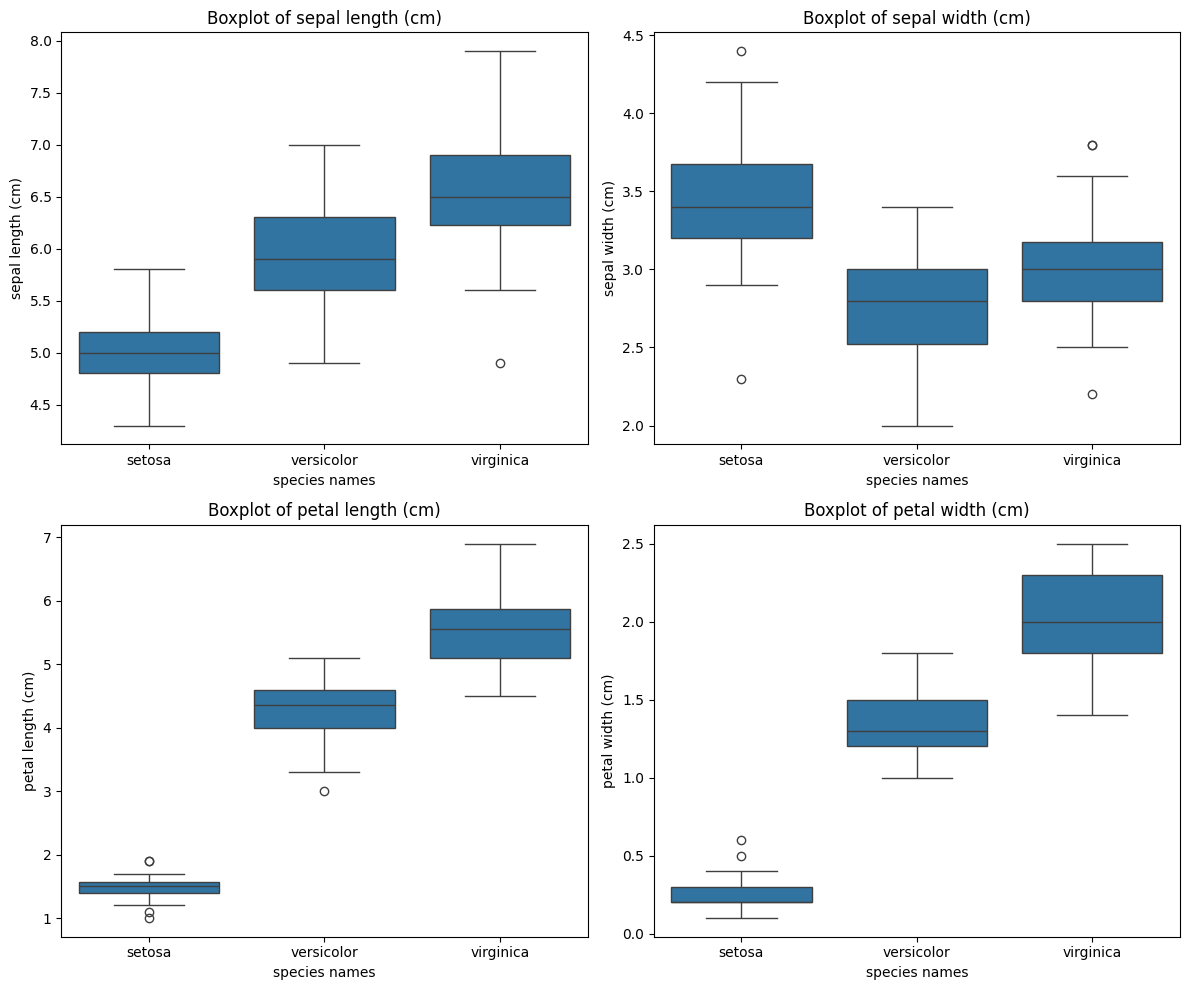

In [ ]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species names', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

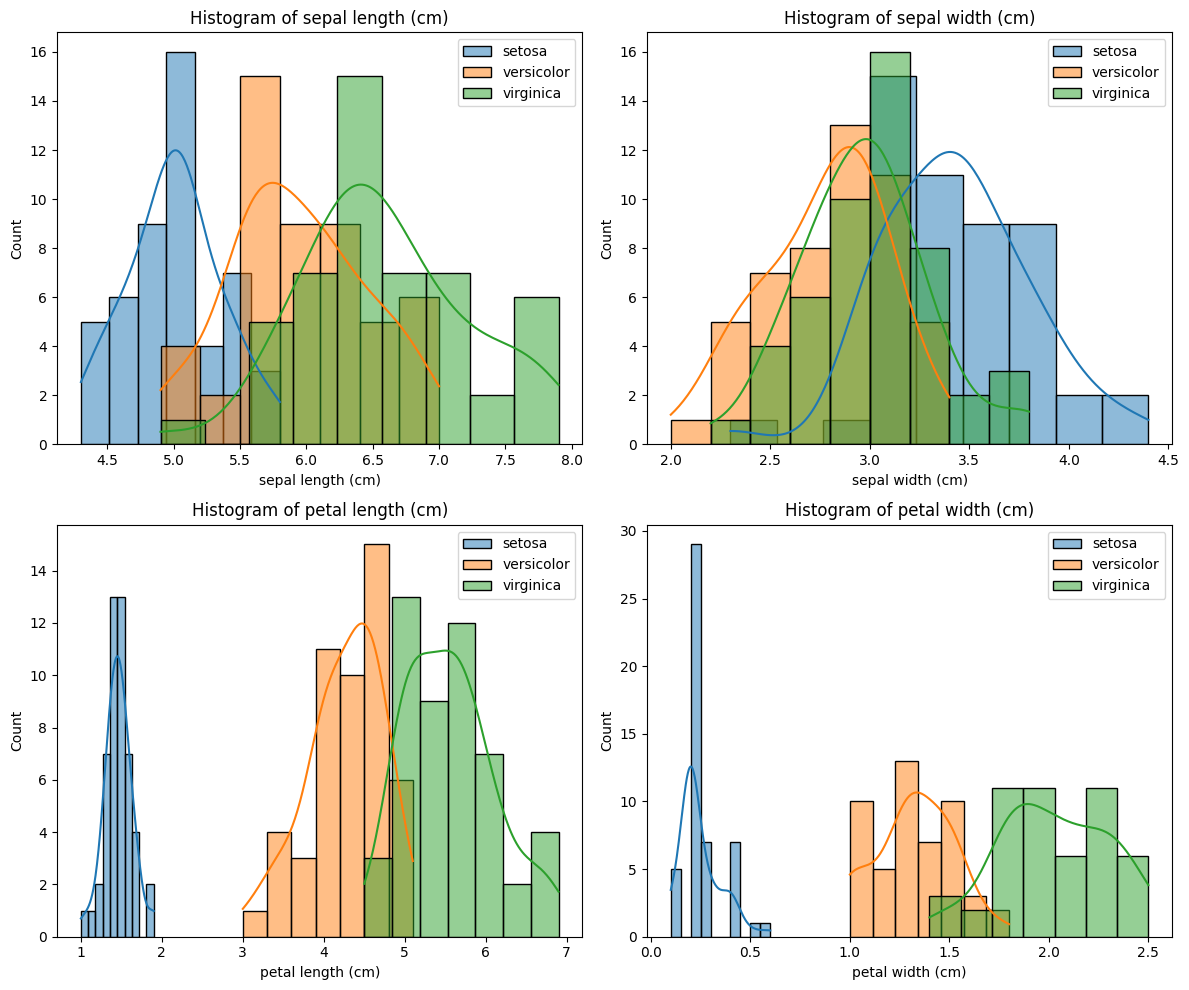

In [ ]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in target_names:
        sns.histplot(df[df['species names'] == species][feature], label=species, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?

Sim, nos gráficos boxplot de comprimento e largura da pétala, é possível observar que cada uma tem uma diferença grande o suficiente para conseguir diferenciar as espécies.

d. Aplique a regressão logística para avaliar o modelo de
classificação.


In [ ]:
y = df['species']
X = df.drop(['species', 'species names'], axis=1)

# Divisão dos dados em conjuntos de treino e teste 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Instanciando o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)

# Treinando o modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

e. Calcule a acurácia, precisão e recall.


In [ ]:
# Previsões no conjunto de teste
y_predict = log_reg.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



f. Plote a matriz de confusao com matplotlib ou seaborn

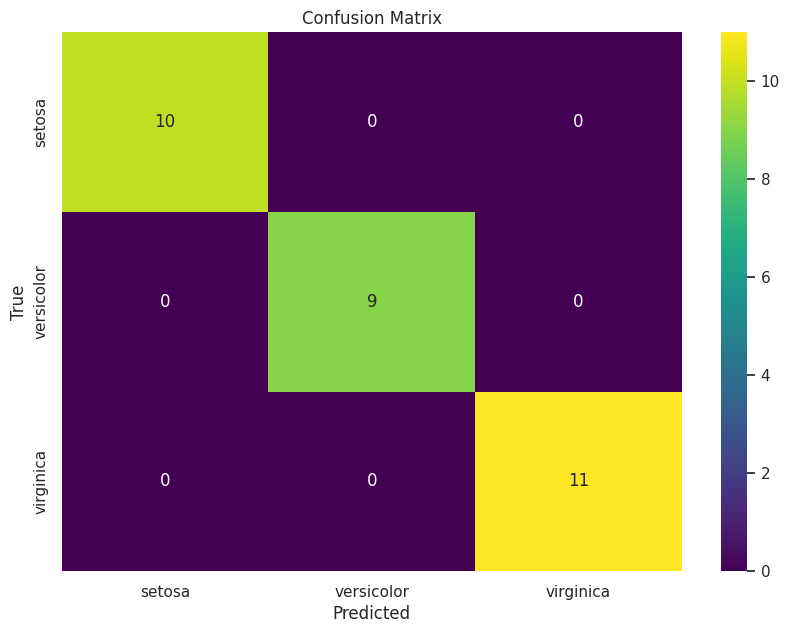

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 2. Utilizando o dataset load_digits. Responda:

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['digits'] = digits.target

df_digits.sample(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digits
1253,0.0,0.0,11.0,16.0,9.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,14.0,8.0,0.0,0.0,0.0,8
210,0.0,0.0,0.0,0.0,7.0,14.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,15.0,0.0,0.0,1
181,0.0,1.0,12.0,14.0,10.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,10.0,15.0,13.0,9.0,4.0,0.0,2
779,0.0,1.0,13.0,16.0,12.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,14.0,16.0,11.0,5.0,0.0,0.0,3
647,0.0,0.0,5.0,10.0,8.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,9.0,0.0,0.0,0.0,1


In [ ]:
df_digits.shape

(1797, 65)

In [ ]:
df_digits.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
digits       0
Length: 65, dtype: int64

In [ ]:
print(df_digits.dtypes)

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
digits         int64
Length: 65, dtype: object


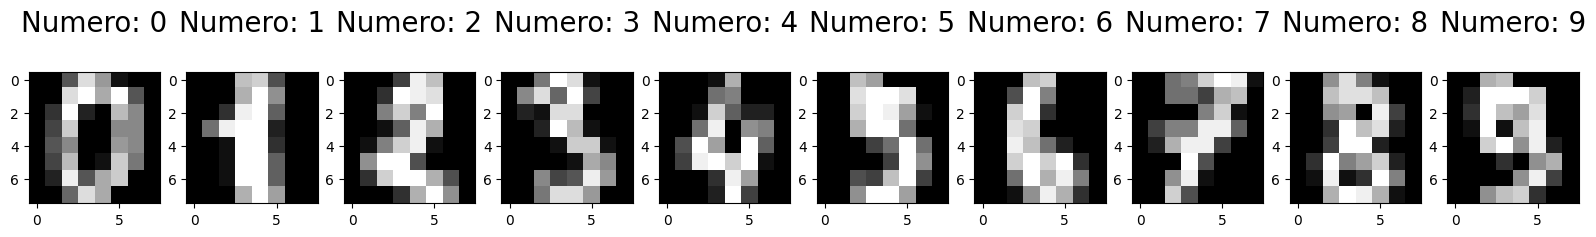

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Numero: %i\n' % label, fontsize = 20)

b. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

In [ ]:
y = df_digits['digits']
X = df_digits.drop(['digits'], axis = 1)

# Divisão dos dados em conjuntos de treino e teste 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Instanciando o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)

# Treinando o modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

c. Calcule a acurácia, precisão e recall.

In [ ]:
# Previsões no conjunto de teste
y_predict = log_reg.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



d. Plote a matriz de confusão com matplotlib ou seaborn

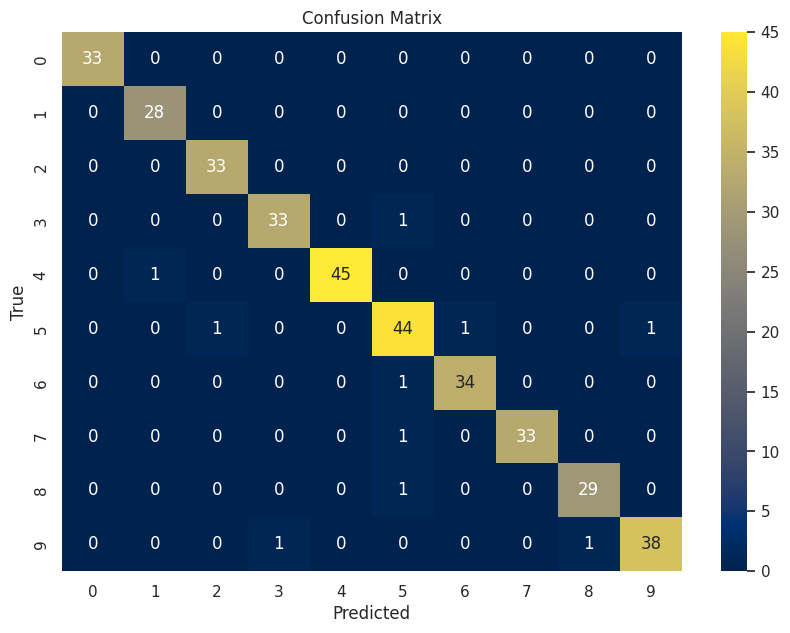

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()